# TP 1 Reinforcment Learning

Remarques :

. Deux parties : dans la première on suppose qu'on connait le MDP et dans la deuxième on se base sur des données et on ne connaît pas le MPD.

. Suitable structures : pour $p(y,a,x)$ qu'il va falloir store , on peut $p_{1}(y,x)$ et $p_{2}(y,x)$

. Faire tout en vectoriel matrix form

. Faire un truc simple pour modéliser le growth du tree

. Lorsque le tree est malade et qu'on le coupe on prend un reward négatif car il ne va rien rapporter en bois

.tree_sim une étape et tree_MDP c'est le truc entier. 

### Modelisation

* L'arbre est modélisé par un entier entre 0 et H. (au début à zéro) c'est le state space.

* Action space : 0 ou 1 (cut ou pas cut)

* Reward :
    - Maintenance : reward -10
    - Unit of wood : reward 10
    - Cost of planting : reward -5
    
* Discount factor : $\gamma=\frac{1}{1+r}$ avec $r=0.05$



### Growth of tree

A chaque itération on a une proba 3/4 que l'arbre grandisse d'une unité.

Ensuite il peut tomber malade avec un probabilité 1/16.

Grandir de deux unités avec une proba de 1/16. 

Ne pas grandir avec une probabilité 1/8.

Si l'arbre est malade il ne peut pas grandir.

### Variables

a c'est l'action integer

r reward integer.

Notre state $x$ est un entier : il peut valoir -1 si l'arbre est malade, ou sinon il varie de 1 à H pour la taille de l'arbre.

En gros on aura toujours nous $x=-1 \implies \pi(x)=1$

In [41]:
%matplotlib inline 
import random as rd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

In [19]:
class Tree:
    
    def __init__(self,initSize,H,valueUnitOfWood=10,costOfPlanting=-5
                 ,costOfMaintenance=-10,probaOfSick=1/16,probaOfGrowTwice=1/16,probaOfNotGrow=2/16, gamma = 1/(1+0.05)):
        self.size=initSize
        self.initSize=initSize
        self.Hmax=H
        self.valueUnitOfWood=valueUnitOfWood
        self.costOfPlanting=costOfPlanting
        self.costOfMaintenance=costOfMaintenance
        self.probaOfSick=probaOfSick
        self.probaOfGrowTwice=probaOfGrowTwice
        self.probaOfNotGrow=probaOfNotGrow
        self.probaOfGrowOne=1-(self.probaOfNotGrow+probaOfGrowTwice+probaOfSick)
        self.gamma = gamma
    

 
    def tree_sim(self,x,a,verbose=0): # Simulate one state
        
        reward=0
        
        if a==1 or x==-1 : # If the agent decide to cut the three or if the three is sick
            # rewards is height of the three * value of wood unit - cost of planting
            # if the three is sick the reward is only the cost of planting
            if x==-1:
                reward=self.costOfPlanting
                if verbose==1 :
                    print('Tree was sick and has been cut.')
            else:
                reward=x*self.valueUnitOfWood+self.costOfPlanting
                if verbose==1 :
                    print('Tree has been cut.')
            x=1
        
        else : # The three isn't cut
            choose=rd.random() # A float between 0 and 1.

            # Sick tree with prob 1/16
            
            if choose<=(self.probaOfSick) :
                if verbose==1 :
                    print('The tree is falling sick')
                reward=self.costOfMaintenance
                x=-1
              
            # Growing of two units with prob 1/16
            
            if choose>self.probaOfSick and choose<=(self.probaOfSick+self.probaOfGrowTwice) :
                if verbose==1 :
                    print('The tree grows of two units')
                
                if x<self.Hmax:
                    x=x+2
                
                reward=self.costOfMaintenance
             
            # Don't grow with prob 1/8
            
            if choose>(self.probaOfSick+self.probaOfGrowTwice) and choose<=(self.probaOfSick+self.probaOfGrowTwice+self.probaOfNotGrow):
                if verbose==1 :
                    print('The tree does not grow')
                    
                reward=self.costOfMaintenance

            # Growing of 1 unit with prob 3/4
            
            if choose>(self.probaOfSick+self.probaOfGrowTwice+self.probaOfNotGrow) and choose<=1 :
                if verbose==1 :
                    print('The tree grows of one unit')
                
                if x<self.Hmax:
                    x=x+1
                
                reward=self.costOfMaintenance


        return reward,x
        
    def tree_MDP(self,actions,verbose=0): # Complete MDP, given actions
        
        rewards=[]
        treeSizes=[]
        i=1
        
        if len(actions)==1:
            a=actions[0]
            sim=self.tree_sim(self.size,a,verbose)
            treeSizes=sim[1]
            rewards=sim[0]
            self.size=treeSizes
            
        if len(actions)>1:
            for a in actions:
                sim=self.tree_sim(self.size,a,verbose)
                x=sim[1]
                r=sim[0]*self.gamma**(i) # Discounted reward
                self.size=x
                treeSizes.append(x)
                rewards.append(r)
                i = i+1
            
        return rewards,treeSizes
    

        
    def plot_MDP(self,rewards,treeSizes,cumul=True): # Plot cumulative rewards and three height
            

        plt.figure(figsize=(20,10))
        limit=np.zeros(len(treeSizes))-1
        plt.subplot(1,2,1)
        plt.plot(treeSizes,color='darkgreen',lw=3)
        plt.plot(limit,color='red',lw=1,alpha=0.8,linestyle='--')
        plt.xlim([-1,len(rewards)])
        #plt.ylim([0,max(treeSizes)+1])
        plt.title('Simulation of a growing tree', fontsize=15)
        plt.ylabel('Tree\'s Height', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(max(treeSizes)))
       
        plt.subplot(1,2,2)
        plt.plot(rewards,'r-')
        if cumul==True:
            plt.plot(np.cumsum(rewards),'b--',lw=2)
        plt.title('Rewards', fontsize=15)
        plt.ylabel('Value of rewards', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(min(np.cumsum(rewards)),max(rewards),3))
        plt.legend(['Reward at each time','Cumulative sum of rewards'])

        plt.show()
        
   
    

### Simulation MDP tree with a fixed and arbitrary policy

In [27]:
t=Tree(initSize=1,H=100)
actions=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0]
rewards,treeSizes=t.tree_MDP(actions,verbose=1)

52
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
Tree has been cut.
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
Tree has been cut.
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
Tree has been cut.
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one unit
The tree grows of one 

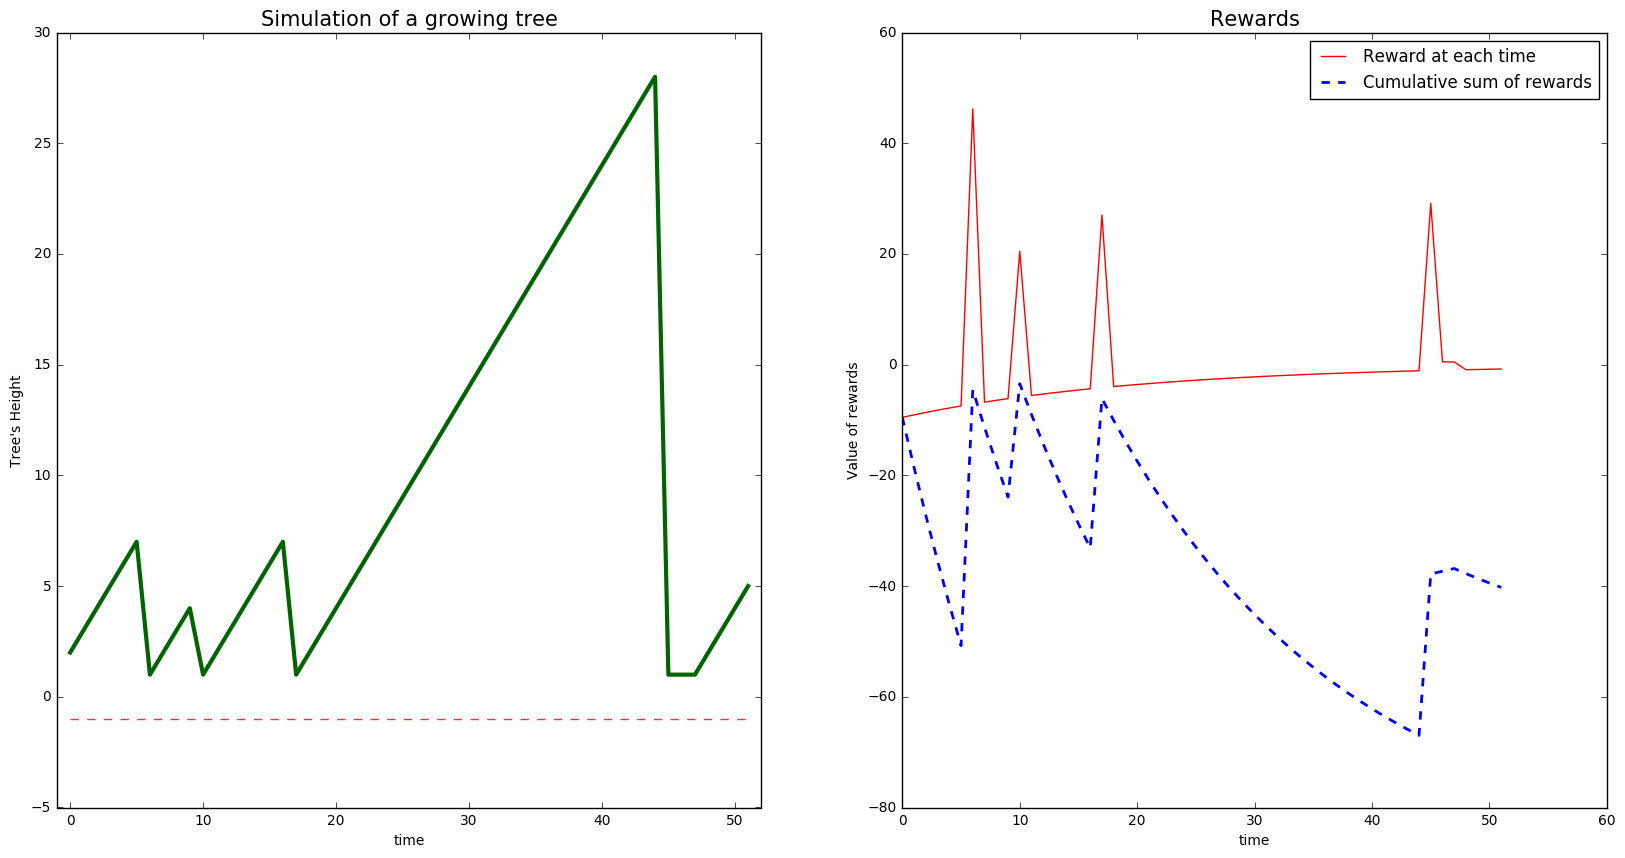

In [5]:
t.plot_MDP(rewards,treeSizes)

### Fixed policy evaluation with every visit Monte-Carlo

In [9]:
class Agent :
        
    def policy(self,nIter,nbRuns,Tree):
        raise NotImplementedError("Dumb ass ! Please implement this method")
        
    
        

Previously we evaluate one trajectories of our arbitrary policy. Then we are going to evaluate this policy with a every visit Monte-Carlo method.

In [30]:
class ArbitraryAgent(Agent):
    
    #def __init__(self):
     #   Agent.__init__(self)
    
    def policy(self,nIter,tree,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))
        actions=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0]

        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
                ,costOfMaintenance=tree.costOfMaintenance
                ,costOfPlanting=tree.costOfPlanting
                ,H=tree.Hmax
                ,valueUnitOfWood=tree.valueUnitOfWood)
            #actions=np.zeros(nIter) # Never cut the three
            mdp=t.tree_MDP(actions)
            rewards[:,run]=mdp[0]
            treeSizes[:,run]=mdp[1]
            
        if nbRuns==1:
            return rewards,treeSizes,actions
        else:
            return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)

#### We will evaluate our policy starting from the state t heigth = 1, with an horizon of 100 iterations, and 100 trajectories.

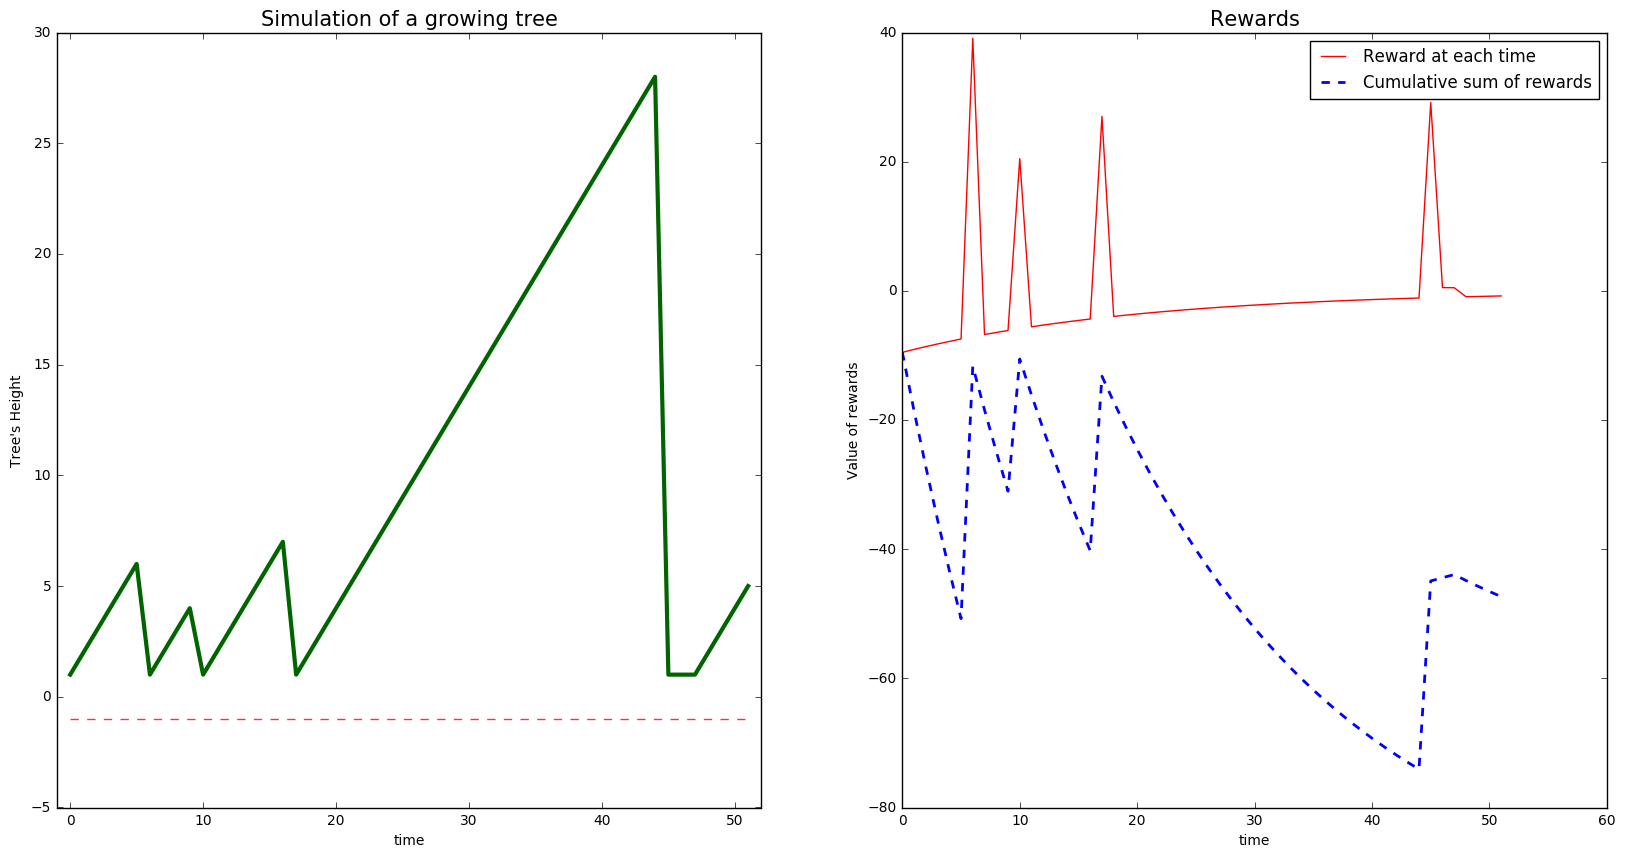

In [32]:
stdA=ArbitraryAgent()
t=Tree(initSize=0,H=100)
stdA.plot_policy(nIter=52,tree=t,nbRuns=100)

As we can see, this policy is far from a good one... 

## Lets compare with a random policy

In [33]:
class AbsurdAgent(Agent):
    
    #def __init__(self):
        #Agent.__init__(self)
    
    def policy(self,nIter,tree,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))

        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
            ,costOfMaintenance=tree.costOfMaintenance
            ,costOfPlanting=tree.costOfPlanting
            ,H=tree.Hmax
            ,valueUnitOfWood=tree.valueUnitOfWood)
            
            actions=list(np.random.randint(2,size=nIter))
            rewards[:,run],treeSizes[:,run]=t.tree_MDP(actions)
         
        if nbRuns==1:
            return rewards,treeSizes,actions
        else:
            return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)

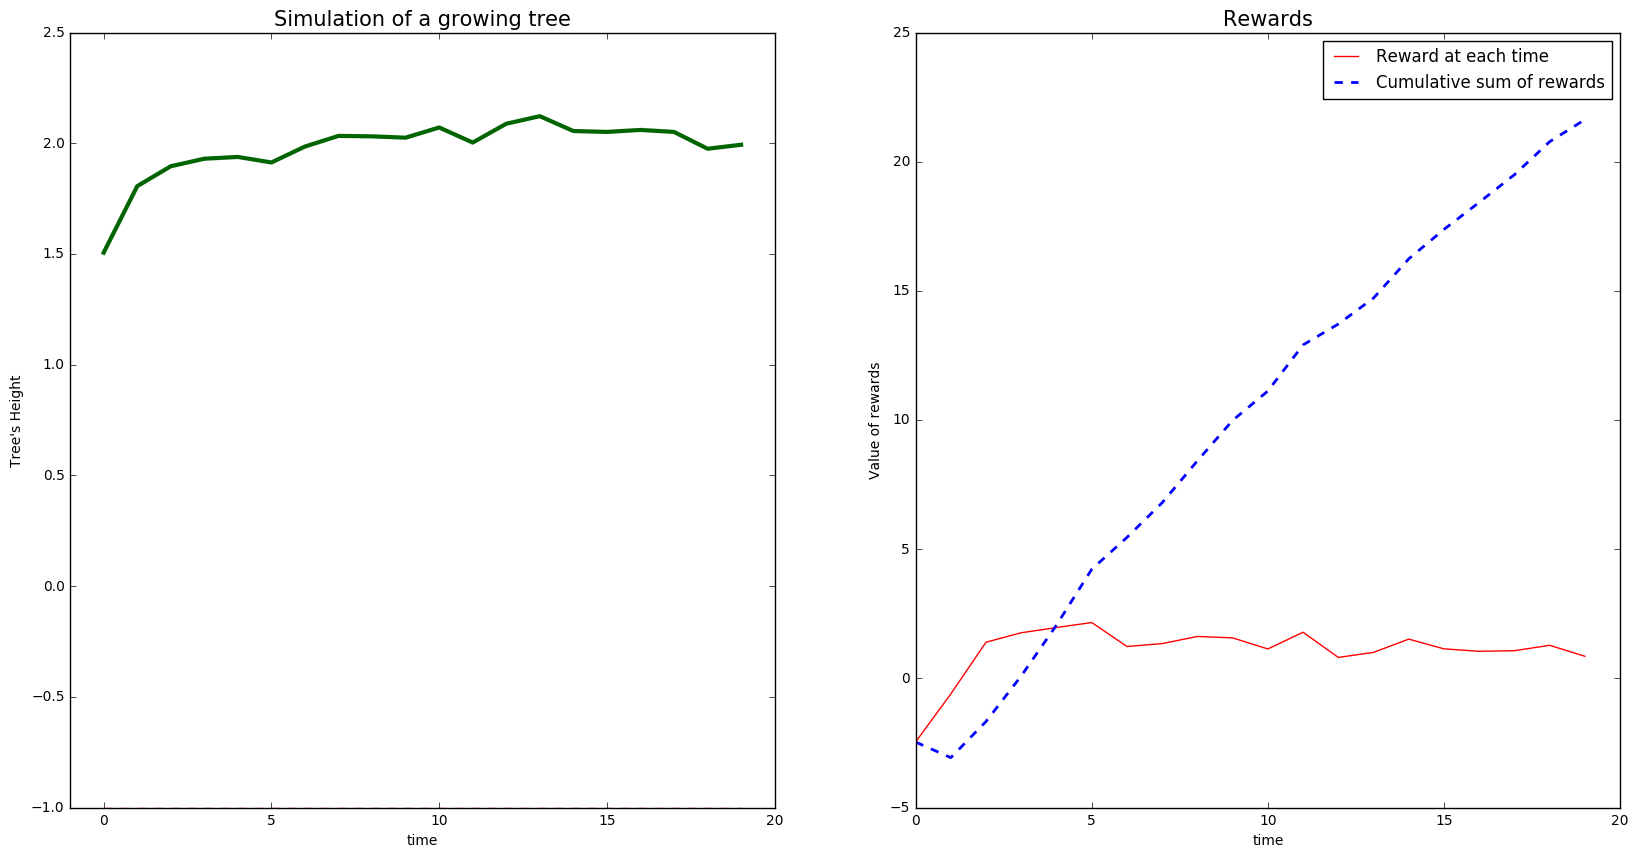

In [34]:
t=Tree(initSize=1,H=100)
absA=AbsurdAgent()
absA.plot_policy(nIter=20,nbRuns=1000,tree=t)

Random policy seems much better than our previous one...
Lets compare on a plot.

In [43]:
rewRandom, treeRandom = absA.policy(nIter = 52,nbRuns=1000,tree=t)
rewArbitrary, treeArbitrary = stdA.policy(nIter=52,nbRuns=1000,tree=t)

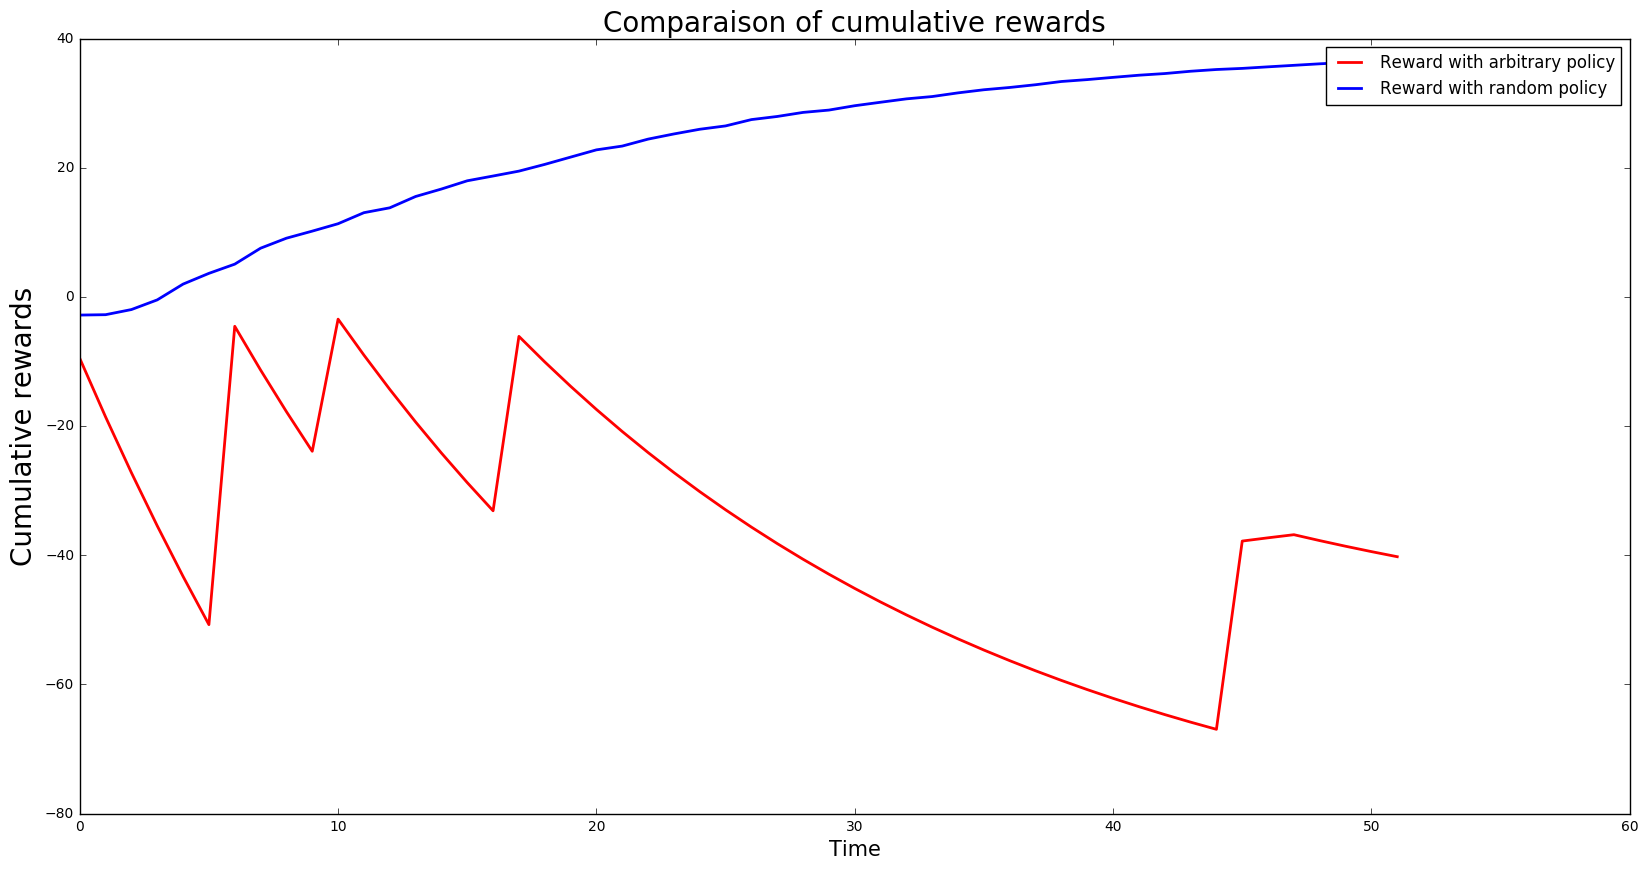

In [50]:
 plt.figure(figsize=(20,10))

plt.plot(np.cumsum(rewArbitrary),'r',lw=2)
plt.plot(np.cumsum(rewRandom),'b',lw=2)
plt.title('Comparaison of cumulative rewards', fontsize=20)
plt.ylabel('Cumulative rewards', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.legend(['Reward with arbitrary policy','Reward with random policy'])

### Policy evaluation Dynamic (via belleman equation)

Comme on veut une policy stationnaire on peut pas prendre l'agent du haut car à un x donné il peut faire de la merde et choisir deux actions différentes. On va plutôt faire un agent tout gentil qui coupe que si l'arbre fait plus de 10.

In [20]:
class ArbitraryAgent(Agent):
    
    def __init__(self,cut=10):
        #Agent.__init__(self)
        self.cut=cut
    
    def policy(self,nIter,tree,verbose=0,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))

        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
            ,costOfMaintenance=tree.costOfMaintenance
            ,costOfPlanting=tree.costOfPlanting
            ,H=tree.Hmax
            ,valueUnitOfWood=tree.valueUnitOfWood)
            actions=[]
            for i in range(nIter):
                
                if t.size>=self.cut:
                    res=t.tree_MDP([1],verbose)
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]
                    actions.append(1)
                else:
                    actions.append(0)
                    res=t.tree_MDP([0],verbose)
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]
                    
        if nbRuns==1:
            return rewards,treeSizes,actions
        else:
            return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)

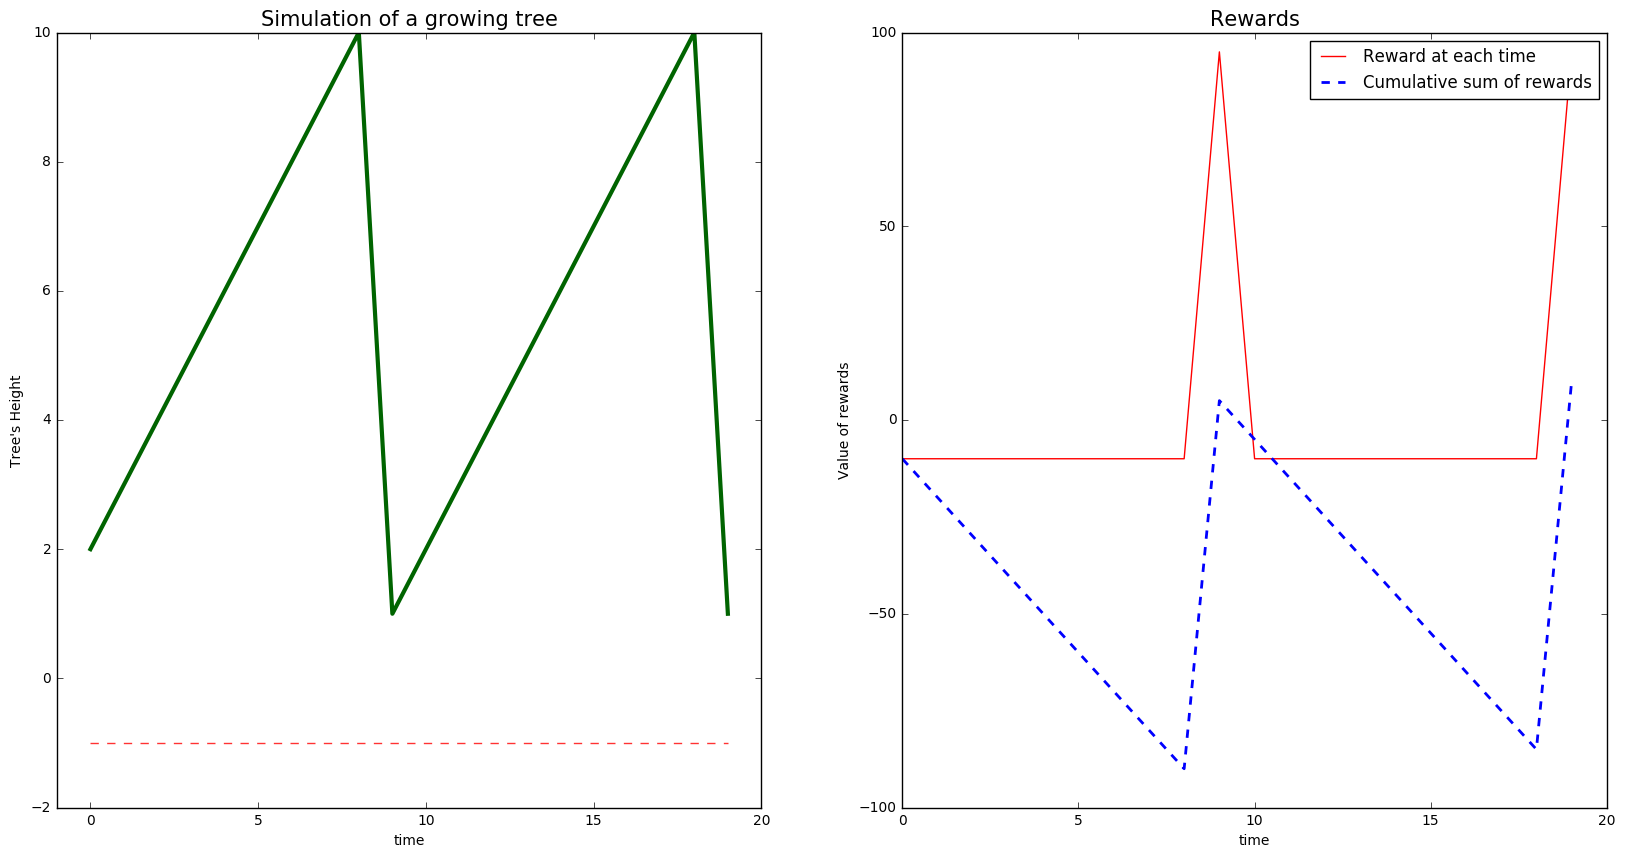

In [21]:
t=Tree(initSize=1,H=100)
arbA=ArbitraryAgent()
arbA.plot_policy(nIter=20,nbRuns=1000,tree=t)

Via belleman equation et inversion 

$$ V= R+\gamma PV $$

$$ V=(I-\gamma P)^{-1}R $$

avec $P$ la matrice des probabilités des transitions de notre système

Plus précisément, lorsque $\pi(x)=0$ (quand on ne coupe pas) on a les transitions qui suivent la matrice $P$ suivante :

$$P1=
\begin{pmatrix}
   0 & 0 & \ldots & \ldots & \ldots & \ldots  & 0 \\
   1/16 & 2/16 & 12/16 & 1/16 & 0 & \ldots  & 0 \\
   1/16 & 0 & 2/16 & 12/16 & \ddots & \ldots & 0 \\
   1/16 & 0 & 0 & 2/16 & \ddots & \ddots  & 0 \\
   \vdots & \vdots & \vdots & 0 & \ddots & \ddots & 1/16\\
   \vdots & \vdots & \vdots & \vdots & \ddots & \ddots & 12/16\\
   1/16 & 0 & 0 & 0 & 0 & 0 & 2/16\\
\end{pmatrix}$$

En notant que les indices de cette matrice est la matrice des $(p(y|x))_{y,x \in [-1,1,...,H]}$. L'indice des lignes est $y$ et celui des colonnes x. Notre première ligne représente donc la situation "on est malade et on va à l'état suivant". Or dans notre cas quand on est malade $\pi(x)=1$ forcément. Donc on ne prendra jamais la première ligne de notre matrice P1 par la suite, ce qui n'est donc pas gênant.

Lorsque $\pi(x)=1$ (quand on coupe) on a :

$$P2=
\begin{pmatrix}
   0 &1 & 0 & \ldots & 0  \\
   0 & 1 & 0 & \ldots & 0 \\
   \vdots & \vdots & \vdots & \ldots & \vdots \\
   0& 1 & 0 &\ldots & 0   
\end{pmatrix}$$

Avec chacune de ces matrices de taille la taille maximale de l'arbre.

En effet dans le cas où on coupe on revient toujours à un arbre de taille 1 avec probabilité 1.

Dans le cas où on ne coupe pas on a les possibilités suivantes :

   - Quand notre arbre est de taille 1. On peut rester de taille 1 en tombant malade (avec proba 1/16) ou en ne grandissant pas (avec proba 2/16). On peut grandir à 2 avec une proba 3/4 ou 12/16. Ou encore grandir à 3 avec une proba 1/16.
   - Quand notre arbre est strictement plus grand que 1. On peut retourner à 1 en tombant malade (proba 1/16) ou grandir de 1 ou 2 avec les probas du dessus. Mais on ne peut pas rétrécir no'y aller ailleurs. D'où la tête de la matrice.
   
On va implémenter ces matrices pour résoudre le problème suivant :

$$ V= R+\gamma PV $$

Pour cela, il va falloir construire notre matrice P. C'est en fait un mix des deux premières matrices. Lorsqu'on coupe on choisit la ligne associé au state de la matrice P1 et lorsqu'on ne coupe pas la ligne associé au state <de la matrice P2 pour former l'équation de Bellman

In [58]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

In [110]:
def computePQ(H):
    a=np.zeros(H)+2/16
    b=np.zeros(H-1)+12/16
    c=np.zeros(H-2)+1/16
    e=np.zeros(H)+1/16
    e[0]=3/16
    P=tridiag(a, b, c,k1=0,k2=1,k3=2)
    P[:,0]=e
    Q=np.zeros((H,H))
    Q[:,0]=np.ones(H)
    return P,Q
    

In [114]:
P,Q=computePQ(100)

In [116]:
I=np.eye(100)
discount=1/1.05
M1=(I-discount*P)
M2=(I-discount*Q)
Pinv=np.linalg.inv(M1)
Qinv=np.linalg.inv(M2)

In [123]:
len(Pinv)

100

In [194]:
meanPolicyValue=[]
t=Tree(initSize=1,H=100)
arbA=ArbitraryAgent()
agent=arbA
r,x,a=agent.policy(nIter=15,tree=t,nbRuns=1)

In [199]:
P1,P2=computePQ(100)
P=np.zeros((100,100))
R=[]
for i in range(11) :
        P[i,:]=P1[i,:]
        R[i]=?????
for i in range(11,100):
        P[i,:]=P2[i,:]
        R[i]=

SyntaxError: invalid syntax (<ipython-input-199-a47d7cda514c>, line 6)

On doit trouver les rewards aussi de chaque state sous la policy

In [188]:
class ComputeMatrix:
    
    def __init__(self,agent,tree,discount=1/1.05):
        self.agent=agent
        self.discount
        self.tree=tree
        
    def computePQ(self,H):
        a=np.zeros(H)+2/16
        b=np.zeros(H-1)+12/16
        c=np.zeros(H-2)+1/16
        e=np.zeros(H)+1/16
        e[0]=3/16
        P=tridiag(a, b, c,k1=0,k2=1,k3=2)
        P[:,0]=e
        Q=np.zeros((H,H))
        Q[:,0]=np.ones(H)
        return P,Q
    
    def tridiag(self,a, b, c, k1=-1, k2=0, k3=1):
        return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    
    def inv(self,P):
        I=np.eye(len(P))
        M1=(I-self.discount*P)
        Pinv=np.linalg.inv(M1)
        return Pinv           

In [ ]:
class ArbitraryAgent(Agent,ComputeMatrix):
    
    def __init__(self,agent,tree,discount=1/1.05,cut=10):
        Agent.__init__(self)
        ComputeMatrix.__init__(self,agent,tree,discount=1/1.05)
        self.cut=cut
    
    def policy(self,nIter,tree,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))

        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
            ,costOfMaintenance=tree.costOfMaintenance
            ,costOfPlanting=tree.costOfPlanting
            ,H=tree.Hmax
            ,valueUnitOfWood=tree.valueUnitOfWood)
            actions=[]
            for i in range(nIter):
                
                if t.size>=self.cut:
                    res=t.tree_MDP([1])
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]
                    actions.append(1)
                else:
                    actions.append(0)
                    res=t.tree_MDP([0])
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]
                    
        if nbRuns==1:
            return rewards,treeSizes,actions
        else:
            return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)
        
    def buildTransitionMatrix(self):
        H=tree.Hmax
        P1,P2=self.computePQ(H)
        P=np.zeros((H,H))
        #A vérifier le +1
        for i in range(self.cut+1) :
                P[i,:]=P1[i,:]
        for i in range(self.cut+1,100):
                P[i,:]=P2[i,:]
        return P
    
    
    def dynamic_evaluation(self,nIter,nTimes,tree):
        
        meanPolicyValue=[]
        for i in range(nTimes):
            r,x=self.agent.policy(nIter=nIter,tree=tree)
            sValue=r     